In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pwd=os.getcwd()
filepath=os.path.join(pwd,"weatherAUS.csv")
filepath
import plotly.express as px


In [2]:
weather_df=pd.read_csv(filepath)

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
weather_df.dropna(subset=['RainTomorrow'],inplace=True)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [4]:
year=pd.to_datetime(weather_df.Date,format='mixed').dt.year

train_df=weather_df[year<2015]

val_df=weather_df[year==2015]

test_df=weather_df[year>2015]

print('train_df.shape :',train_df.shape)
print('val_df.shape :',val_df.shape)
print('test_df.shape :',test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [5]:
input_cols=list(train_df.columns)[1:-1]

target_col='RainTomorrow'

In [6]:
train_inputs=train_df[input_cols].copy()

train_target=train_df[target_col].copy()

val_inputs=val_df[input_cols].copy()

val_target=val_df[target_col].copy()

test_inputs=test_df[input_cols].copy()

test_target=test_df[target_col].copy()

numeric_cols=train_inputs.select_dtypes(include='number').columns.tolist()

categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()



In [7]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')

imputer.fit(weather_df[numeric_cols])  

train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])

val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])

test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(weather_df[numeric_cols])

train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])

val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

encoder.fit(weather_df[categorical_cols])

encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])

val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])

test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Shree\AppData\Local\Temp\ipykernel_3168\2204228822.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\Shree\AppData\Local\Temp\ipykernel_3168\2204228822.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To g

In [10]:
x_train=train_inputs[numeric_cols+encoded_cols]

x_val=val_inputs[numeric_cols+encoded_cols]

x_test=test_inputs[numeric_cols+encoded_cols]


In [11]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=42)

In [12]:
model=model.fit(x_train,train_target)

In [13]:
train_preds=model.predict(x_train)
pd.value_counts(train_preds)

C:\Users\Shree\AppData\Local\Temp\ipykernel_3168\1905085411.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


No     76707
Yes    22281
Name: count, dtype: int64

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(train_target,train_preds)



0.9999797955307714

In [15]:
model.predict_proba(x_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

thus our model  is very accurate as the probablity of most of its predictions is one

In [16]:
confusion_matrix(train_target,train_preds)

array([[76705,     0],
       [    2, 22281]], dtype=int64)

In [17]:
model.score(x_val,val_target)    #model.score() computes predictions and compares them to the target

0.7921188555510418

now to compare the accuracy of our validation set to the baseline error or the dummy error

In [18]:
val_target.value_counts()/len(val_target)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

thus our model is just above he baseline error thus its not good

also as train accuracy_score is much higher than val accuracy_score  thus it does not do well on new data thus our model is overfitting

Visualization of our decision tree


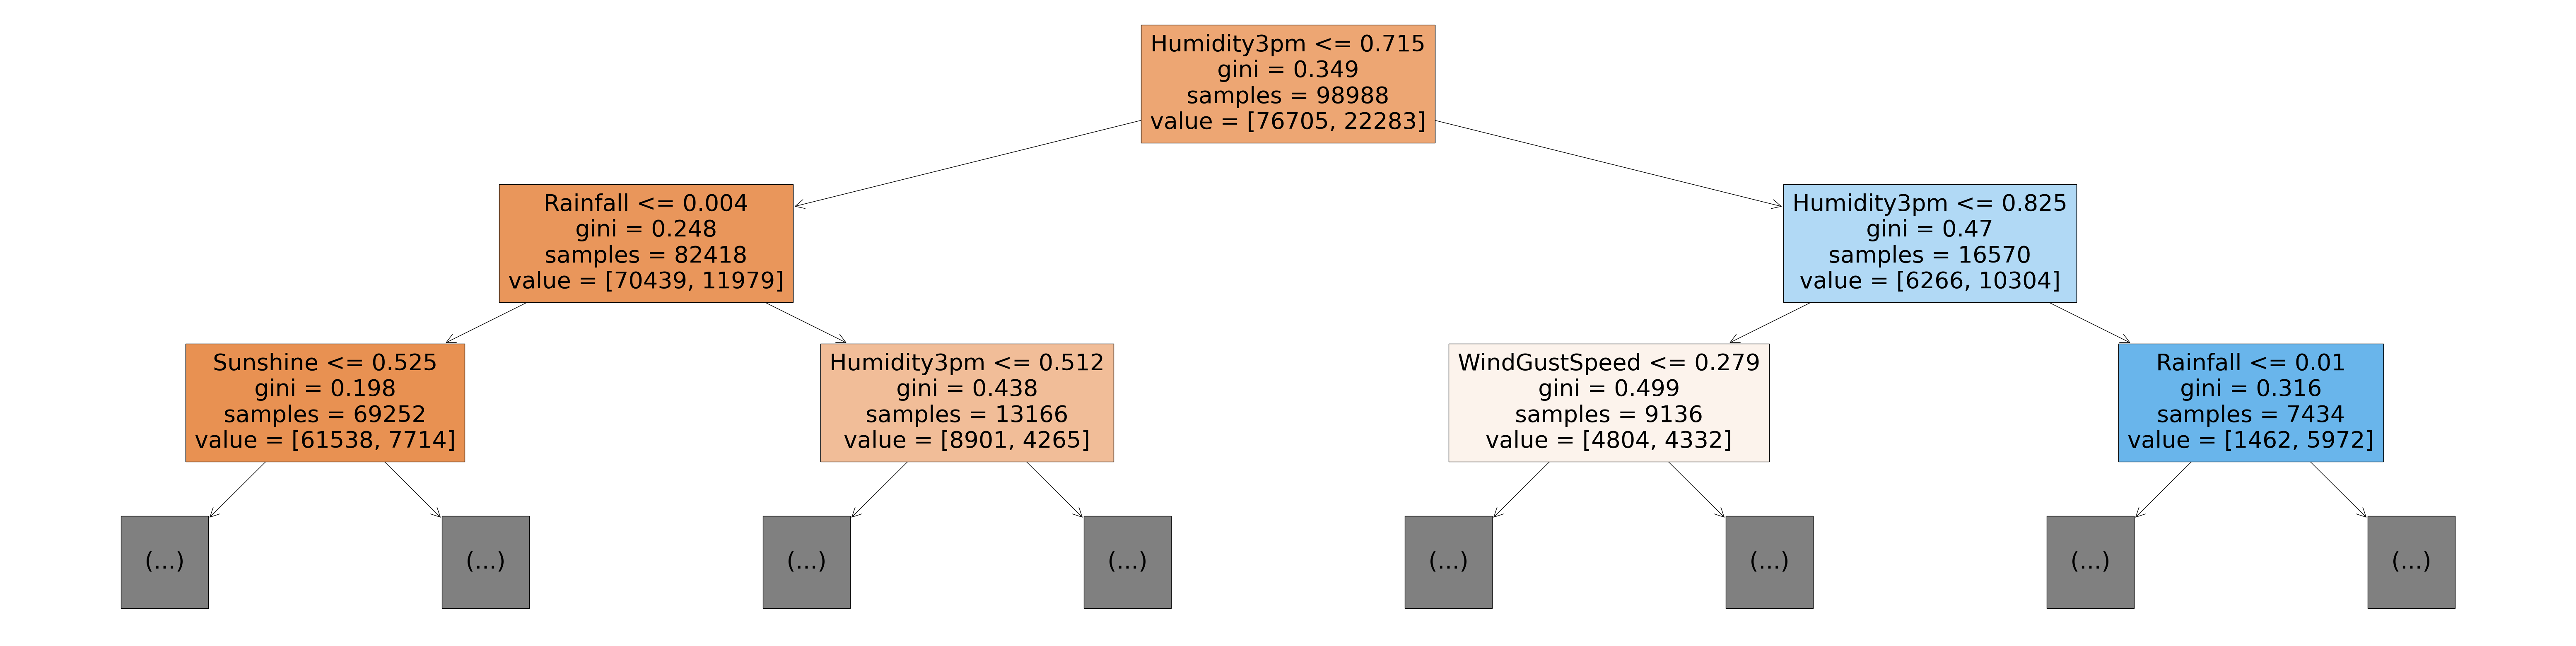

In [23]:
from sklearn.tree import plot_tree,export_text

plt.figure(figsize=(80,20))
plot_tree(model,feature_names=list(x_train.columns),max_depth=2,filled=True)
plt.show()

thus we can see that humidity at 3pm is giving the lowest gini score when we are considering the split for the entire target array

In [27]:
model.tree_.max_depth

48

In [28]:
model.feature_importances_

array([3.48942086e-02, 3.23605486e-02, 5.91385668e-02, 2.49619907e-02,
       4.94652143e-02, 5.63334673e-02, 2.80205998e-02, 2.98128801e-02,
       4.02182908e-02, 2.61441297e-01, 3.44145027e-02, 6.20573699e-02,
       1.36406176e-02, 1.69229866e-02, 3.50001550e-02, 3.04064076e-02,
       2.24086587e-03, 2.08018104e-03, 1.27475954e-03, 7.26936324e-04,
       1.39779517e-03, 1.15264873e-03, 6.92808159e-04, 1.80675598e-03,
       1.08370901e-03, 1.19773895e-03, 8.87119103e-04, 2.15764220e-03,
       1.67094731e-03, 7.98919493e-05, 1.10558668e-03, 1.42008656e-03,
       4.10087635e-04, 1.09028115e-03, 1.44164766e-03, 9.08284767e-04,
       1.05770304e-03, 6.18133455e-04, 1.80387272e-03, 2.10403527e-03,
       2.74413333e-04, 7.31599405e-04, 1.35408990e-03, 1.54759332e-03,
       1.30917564e-03, 1.07134670e-03, 8.36408023e-04, 1.62662229e-03,
       1.00326116e-03, 2.16053455e-03, 8.46802258e-04, 1.88919081e-03,
       9.29325203e-04, 1.29545157e-03, 1.27604831e-03, 5.12736888e-04,
      

Hyperparameter tuning

In [62]:
model=DecisionTreeClassifier(max_depth=8,random_state=42)

model.fit(x_train,train_target)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [63]:
model.score(x_train,train_target)

0.8521942053582252

In [64]:
model.score(x_val,val_target)


0.8419708664616099

In [65]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(x_train,train_target)
    train_error=1-model.score(x_train,train_target)
    val_error=1-model.score(x_val,val_target)
    return {'Max depth':md,'Training error':train_error,'validation error':val_error}
    

In [66]:
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,21)]) 

In [67]:
errors_df

,Max depth,Training error,validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


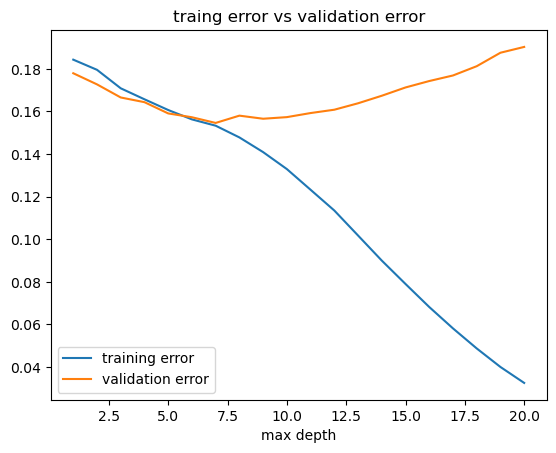

In [69]:
plt.figure()
plt.plot(errors_df['Max depth'],errors_df['Training error'])
plt.plot(errors_df['Max depth'],errors_df['validation error'])
plt.title("traing error vs validation error")
plt.xlabel('max depth')
plt.legend(['training error','validation error'])



thus the best max depth is 7

In [73]:
model=DecisionTreeClassifier(max_depth=7,random_state=42)
model.fit(x_train,train_target)
model.score(x_val,val_target)

0.8453949277465034

Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier


model=RandomForestClassifier(n_jobs=-1,random_state=42)  #n_jobs allows the random forest to use decion trees in parellel rather than one by one

In [79]:
model.fit(x_train,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [80]:
model.score(x_train,train_target)

0.9999494888269285

In [81]:
model.score(x_val,val_target)

0.8566537055307295

In [88]:
len(model.estimators_) #thus we have 100 trees in our random forest

100

[Text(0.5, 0.875, 'Sunshine <= 0.417\ngini = 0.349\nsamples = 62448\nvalue = [76707, 22281]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.745\ngini = 0.499\nsamples = 11821\nvalue = [9860, 8914]'),
 Text(0.125, 0.375, 'Humidity3pm <= 0.625\ngini = 0.45\nsamples = 7988\nvalue = [8315, 4320]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.217\ngini = 0.377\nsamples = 3833\nvalue = [1545, 4594]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Location_MountGinini <= 0.5\ngini = 0.278\nsamples = 50627\nvalue = [66847, 13367]'),
 Text(0.625, 0.375, 'Location_Moree <= 0.5\ngini = 0.273\nsamples = 49365\nvalue = [65436, 12778]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Humidity9am <= 0.665\ngini = 0.416\nsamples = 1262\nvalue = [1411, 589]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')

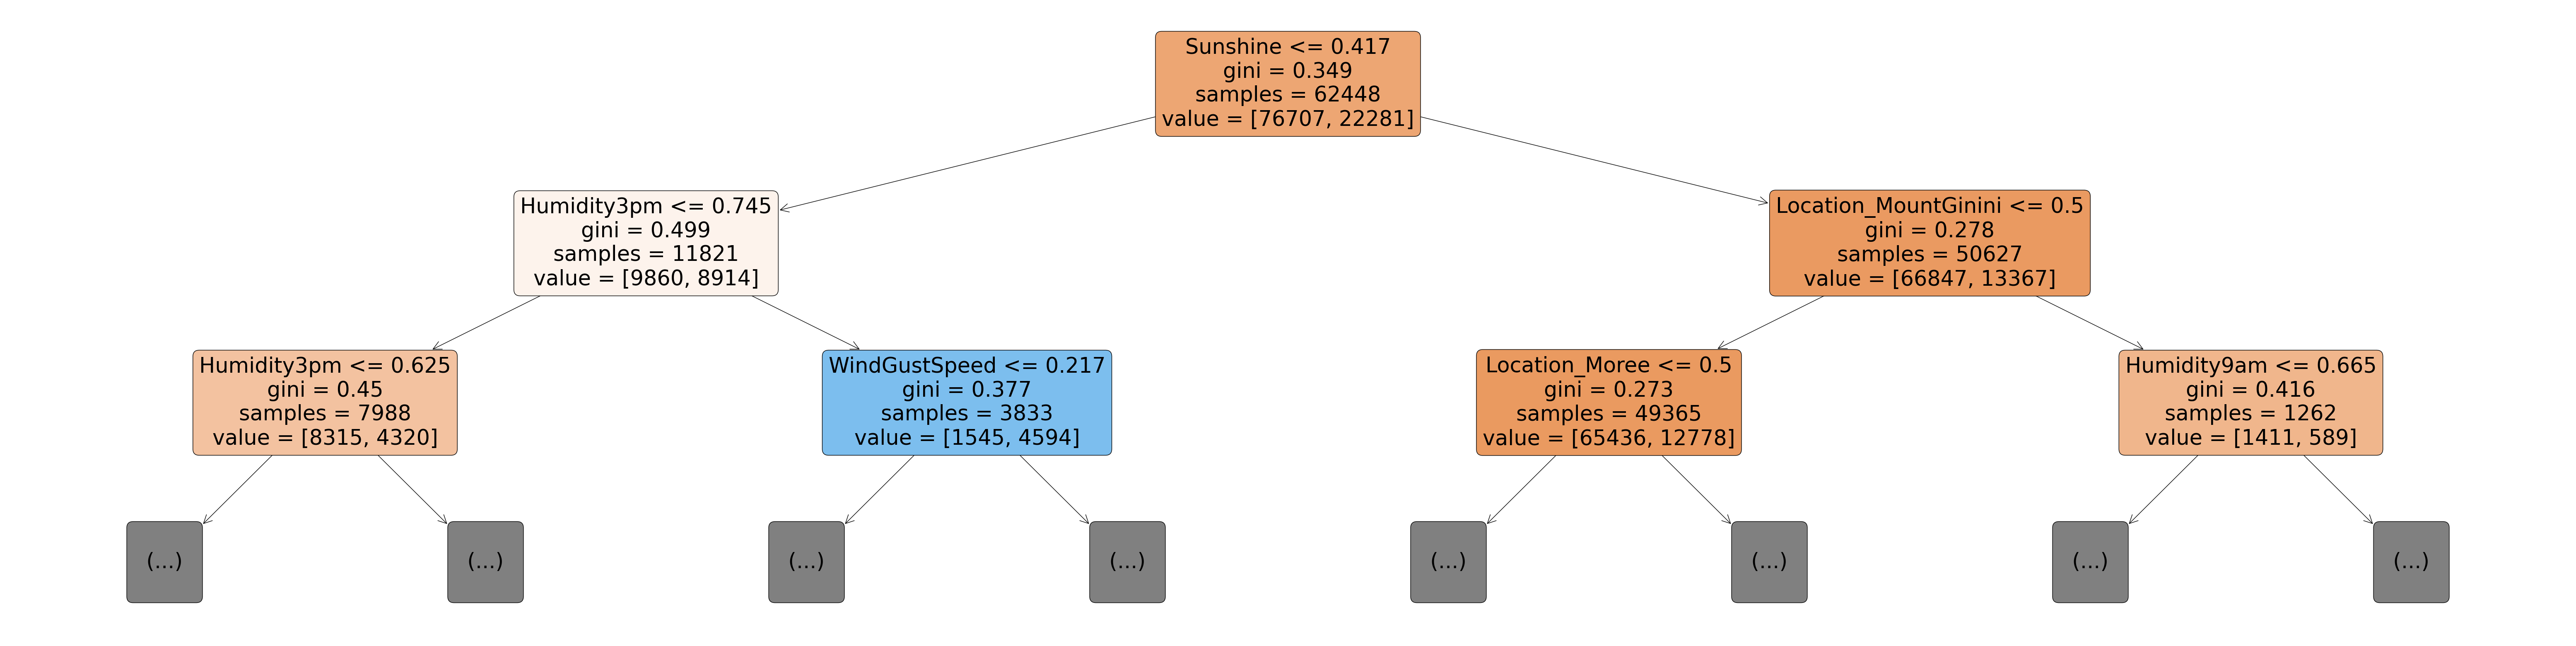

In [95]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15],max_depth=2,feature_names=list(x_train.columns),filled=True,rounded=True)

[Text(0.5, 0.875, 'RainToday_Yes <= 0.5\ngini = 0.349\nsamples = 62610\nvalue = [76714, 22274]'),
 Text(0.25, 0.625, 'WindGustDir_ESE <= 0.5\ngini = 0.262\nsamples = 48715\nvalue = [65024, 11930]'),
 Text(0.125, 0.375, 'Pressure3pm <= 0.505\ngini = 0.267\nsamples = 46043\nvalue = [61211, 11515]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.665\ngini = 0.177\nsamples = 2672\nvalue = [3813, 415]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'WindSpeed3pm <= 0.333\ngini = 0.498\nsamples = 13895\nvalue = [11690, 10344]'),
 Text(0.625, 0.375, 'Sunshine <= 0.534\ngini = 0.495\nsamples = 11567\nvalue = [10070, 8283]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Sunshine <= 0.424\ngini = 0.493\nsamples = 2328\nvalue = [1620, 2061]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

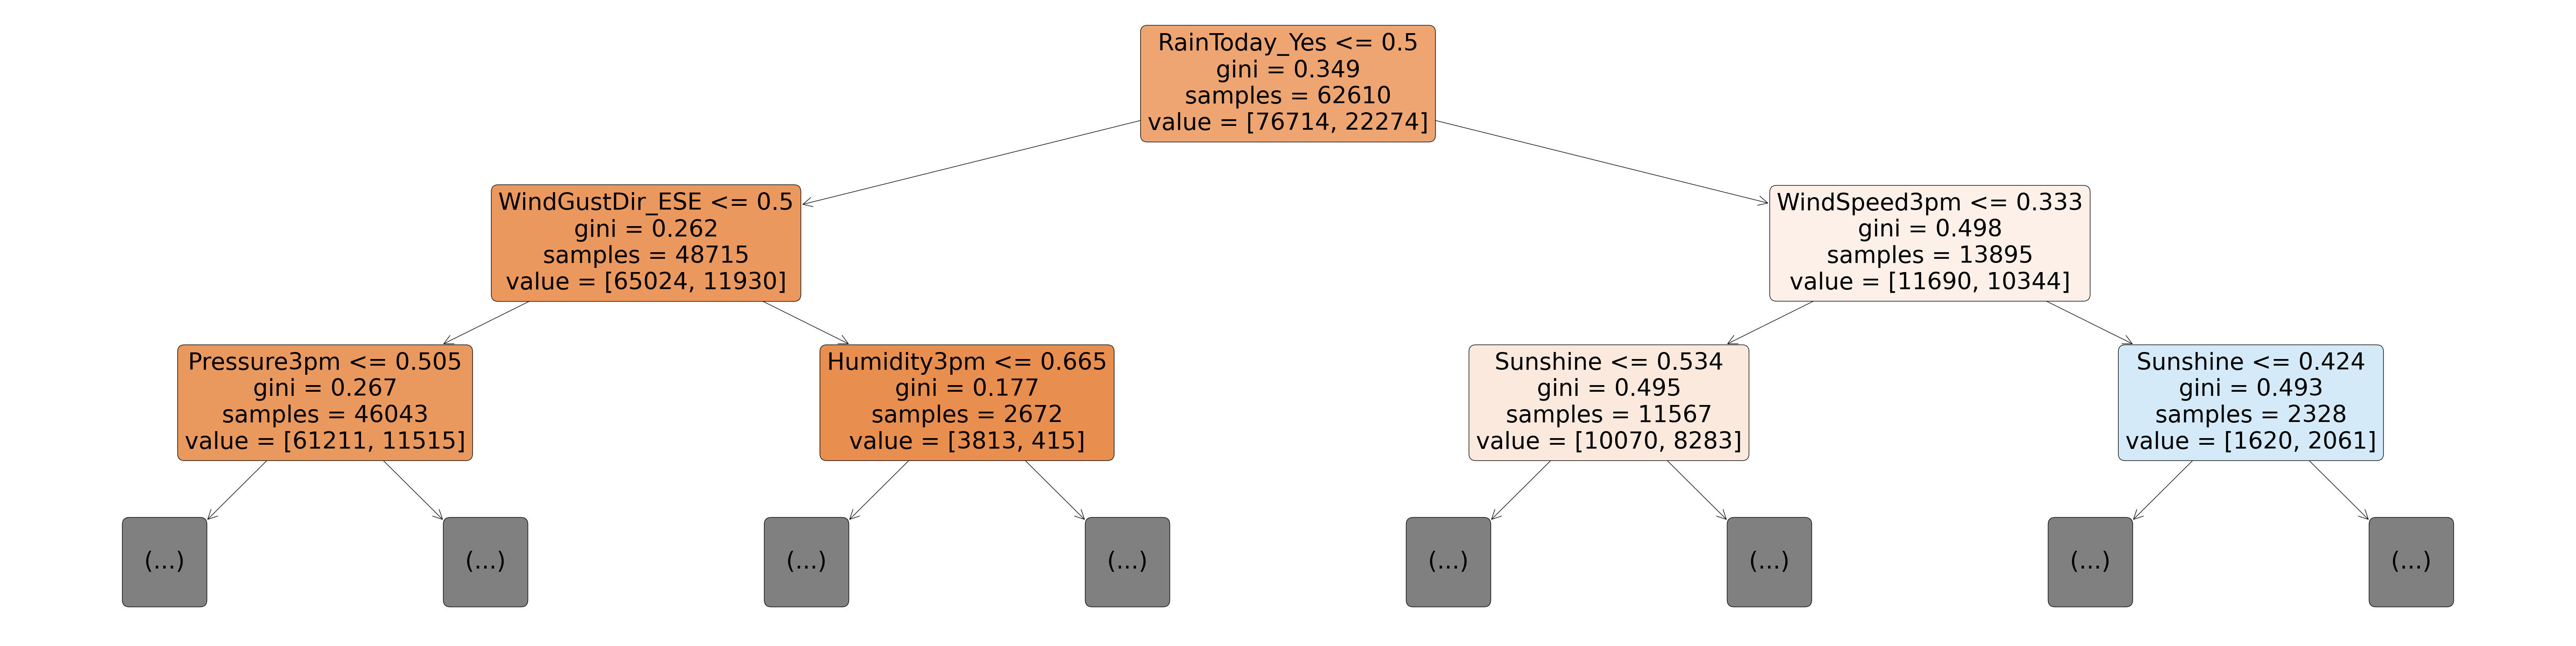

In [96]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20],max_depth=2,feature_names=list(x_train.columns),filled=True,rounded=True)

In [97]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

In [98]:
model.fit(x_train,train_target)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [99]:
model.score(x_train,train_target),model.score(x_val,val_target)

(0.986958015112943, 0.8485868492832686)

thus on reducing no. of trees the accuracy reduced thus we must increase no. of trees

In [102]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=128)

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9999797955307714, 0.8567117404677616)

In [104]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=26)

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9814826039519942, 0.8572340549010504)

In [107]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,max_features='log2') # k=log2(n)  and k<n

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9999595910615429, 0.8558992513493123)

In [108]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,min_impurity_decrease=1e-7)

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9996060128500425, 0.8561313910974406)

In [110]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,bootstrap=False) # by default bootstrap=true

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9999797955307714, 0.8567697754047937)

In [113]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,max_samples=0.9) # bostraping of 90% of rows

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9997676486038711, 0.8565376356566653)

In [114]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,class_weight={'No':1,'Yes':2}) # now the no. of nos is much higher than number of yes thus we may want to balcnce it out by giving more weight to yes 

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9999595910615429, 0.8558412164122802)

In [118]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=128,max_features=7,max_depth=30,class_weight={'No':1,'Yes':1.5})

model.fit(x_train,train_target)

model.score(x_train,train_target),model.score(x_val,val_target)

(0.9908978866125187, 0.8575242295862109)

thus we made our model accuracy from 84.5% to 85.7%

In [119]:
model.score(x_test,test_target)

0.8439208439208439